LINEAR REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(42)

data_size = 50
experience = np.random.randint(1, 21, size = data_size)
education = np.random.randint(1, 5, size = data_size)

noise = np.random.normal(0, 500000, size = data_size)
salary = np.round(1000000 * experience + 500000 * education + noise).astype(int)

df = pd.DataFrame({
    "Experience" : experience,
    "Education" : education,
    "Salary" : salary
})

df

,Experience,Education,Salary
0,7,4,8661539
1,20,4,22305838
2,15,2,16515500
3,11,2,12465640
4,8,2,8580391
5,7,2,7845394
6,19,2,20165632
7,11,4,13487773
8,11,2,11760413
9,4,1,4407171


In [7]:
x = df[["Experience", "Education"]]
y = df[["Salary"]]

scaler_x = MinMaxScaler()
x_scale = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_scale = scaler_y.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=42)

x_train

array([[0.94736842, 0.33333333],
       [0.31578947, 0.        ],
       [0.68421053, 0.        ],
       [0.84210526, 0.        ],
       [0.05263158, 0.33333333],
       [0.15789474, 0.        ],
       [0.        , 0.33333333],
       [0.94736842, 0.66666667],
       [0.15789474, 0.        ],
       [0.42105263, 0.        ],
       [0.31578947, 1.        ],
       [0.73684211, 0.66666667],
       [0.10526316, 0.33333333],
       [0.89473684, 0.66666667],
       [0.31578947, 0.33333333],
       [0.94736842, 0.        ],
       [0.10526316, 0.33333333],
       [0.89473684, 0.33333333],
       [1.        , 1.        ],
       [0.78947368, 0.66666667],
       [0.73684211, 0.33333333],
       [0.36842105, 0.        ],
       [0.68421053, 1.        ],
       [0.73684211, 0.33333333],
       [0.73684211, 1.        ],
       [0.36842105, 0.66666667],
       [0.73684211, 1.        ],
       [0.57894737, 0.33333333],
       [0.89473684, 0.        ],
       [0.47368421, 1.        ],
       [0.

MODELING

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([0.57899619, 0.97751686, 0.32992078, 0.05785446, 0.57899619,
       0.15620687, 0.90471087, 0.57899619, 0.28138345, 0.80380295,
       0.03230804, 0.33119854, 0.35674496, 0.48064379, 0.48064379])

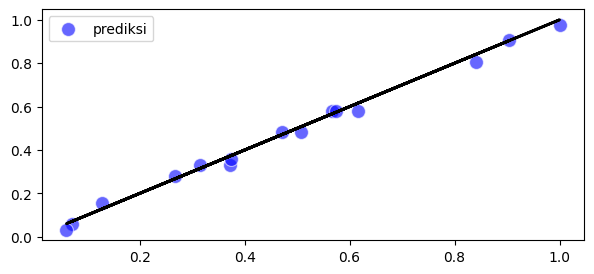

In [10]:
plt.figure(figsize=(7,3))
sns.scatterplot(x = y_test, y = y_pred, color = "blue", alpha = 0.6, s = 100, label = "prediksi")
plt.plot(y_test, y_test, color = "black", linewidth = 2, label = "Actual")
plt.show()

In [11]:
model.score(x_test, y_test)

0.992814325133279

In [15]:
new_data = pd.DataFrame({
    "Experience" : [1,10,5],
    "Education" : [1,2,2]
})

new_data_scale = scaler_x.transform(new_data)
prediction_norm = model.predict(new_data_scale)
prediction = scaler_y.inverse_transform(prediction_norm.reshape(-1,1))

new_data["Salary"] = np.round(prediction.flatten()).astype(int)

new_data

,Experience,Education,Salary
0,1,1,1332625
1,10,2,10928150
2,5,2,5871047


ASSIGNMENT

1

In [16]:
import pandas as pd

covid = pd.read_csv("new_covid19.csv")
covid

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


2

In [29]:
covid.isnull().sum()

Date_reported        0
Country_code         0
Country              0
Continent            0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [30]:
covid.fillna(0, inplace=True)
covid.isnull().sum()

Date_reported        0
Country_code         0
Country              0
Continent            0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [31]:
covid_copy = covid.copy()
covid_copy.dropna(inplace=True)
covid_copy.drop_duplicates(inplace=True)


3

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler_covid = LabelEncoder()
covid["Country_encoded"] = scaler_covid.fit_transform(covid["Country"])
covid

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_encoded
12,2020-03-29,AF,Afghanistan,Asia,EMRO,67.0,91,2.0,2,0
13,2020-04-05,AF,Afghanistan,Asia,EMRO,183.0,274,3.0,5,0
14,2020-04-12,AF,Afghanistan,Asia,EMRO,247.0,521,10.0,15,0
15,2020-04-19,AF,Afghanistan,Asia,EMRO,387.0,908,15.0,30,0
16,2020-04-26,AF,Afghanistan,Asia,EMRO,422.0,1330,13.0,43,0
...,...,...,...,...,...,...,...,...,...,...
58523,2023-12-24,ZW,Zimbabwe,Africa,AFRO,23.0,266048,1.0,5731,210
58525,2024-01-07,ZW,Zimbabwe,Africa,AFRO,46.0,266117,3.0,5734,210
58526,2024-01-14,ZW,Zimbabwe,Africa,AFRO,85.0,266202,3.0,5737,210
58532,2024-02-25,ZW,Zimbabwe,Africa,AFRO,5.0,266355,2.0,5739,210


4

In [38]:
x = covid[["Country_encoded", "New_deaths", "Cumulative_cases"]]
y = covid[["Cumulative_deaths"]]

norm_covid = MinMaxScaler()
y_norm = norm_covid.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x train = {len(x_train)}, x test = {len(x_test)}")
print(f"y train = {len(y_train)}, y test = {len(y_test)}")

x train = 19176, x test = 4794
y train = 19176, y test = 4794


5

In [39]:
model_covid = LinearRegression()
model_covid.fit(x_train, y_train)

y_pred = model_covid.predict(x_test)

y_pred

array([[ 5796.30546498],
       [11076.26940528],
       [39768.0807961 ],
       ...,
       [43294.94400091],
       [12914.68715863],
       [ 5715.31964405]])

6

In [40]:
model_covid.score(x_test, y_test)

0.6380630117373949

DECISION TREE

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("death_clean.csv")
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


In [51]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

In [52]:
x = df[["Cause", "Type"]]
y = df[["Total Deaths"]]

x_encoded = pd.get_dummies(x, columns=["Cause", "Type"])

scaler = MinMaxScaler()
y_norm = scaler.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size=0.3, random_state=42)

In [53]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

y_pred = model_tree.predict(x_test)
y_pred

array([0.12955149, 0.07946554, 0.04360056, 0.06153305, 0.10873093,
       0.10873093, 0.07946554, 0.        , 0.00803697, 0.0323488 ,
       0.        , 0.60970464, 0.07946554, 0.17862166, 0.41772152,
       0.07946554, 0.        , 0.60970464, 0.01054852, 0.0323488 ,
       0.03164557, 0.27707454, 0.30098453, 0.0121894 , 0.07946554,
       0.        , 0.        , 0.02756681, 0.10423504, 0.10423504,
       0.01172058, 0.        , 0.        , 0.07946554, 0.03248945,
       0.07946554, 0.60970464, 0.27707454, 0.08415377, 0.08415377,
       0.12955149, 0.        , 0.0140647 , 0.07946554, 0.03248945,
       0.35864979, 0.10873093, 0.10423504, 0.02390999, 0.10423504,
       0.03164557, 0.02208158, 0.        , 0.        , 0.01312705,
       0.00225035, 0.10873093, 0.10873093, 0.1203171 , 0.69057665,
       0.        , 0.        , 0.01898734, 0.28691983, 0.06153305,
       0.60970464, 0.19878106, 0.35864979, 0.10873093, 0.1203171 ,
       0.07946554, 0.        , 0.01312705, 0.00843882, 0.07946

In [55]:
score = model_tree.score(x_test, y_test)
score

0.7503779883924386